# Project 1

In the unit, we learned about approximating derivatives as well as approximation by polynomial. That is, given two points, we can approximation a derivative by computing the slope of the secant line: 

f'(a) ≈ m = (y_2 - y_1) / (x_2 - x_1)

With n points, we can find a polynomial of degree n-1 that connects them. 

In this assignment, you will study the trends by assessing discrete approximations of the derivative and impute (meaning add missing values) to the provided dataset on CO2 Levels using polynomials. 

In other words, the data is yearly. Any missing years will be imputed.

Your deliverables are: 

Provide all the derivative approximations and an accompanying analysis. What can you say about the data based on the estimated derivatives? 
Use linear (degree 1) approximation to estimate missing values within the dataset, with neighboring points. 
Use quadratic (degree 2) approximation to estimate missing values within the dataset, with neighboring points. 
Use cubic (degree 3) approximation to estimate missing values within the dataset, with neighboring points. 


Once you have done this, write a document summarizing your findings. State the imputation methods (do not include code!) and provide visualizations illustrating the results. Explain what differences you noticed in the datasets based on the imputation methods.

In summary, your deliverables will be: 

a Jupyter notebook of your work with the work detailed
1 pdf of a write up ( stand-along document that does not rely on your notebook explaining your work without code to a general audience)

In [1359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1360]:
df = pd.read_csv('annual_global_CO2_levels.txt', delimiter = "\t", names = ["Year", "CO2 Level"], skiprows = 1)

print(df.head(20))

# check the data types of the columns
print(df.dtypes)



    Year  CO2 Level
0   1940       4.86
1   1941       4.97
2   1942       4.96
3   1943       5.04
4   1944       5.12
5   1946       4.65
6   1947       5.15
7   1948       5.42
8   1949       5.18
9   1950       5.93
10  1951       6.38
11  1952       6.47
12  1953       6.65
13  1954       6.79
14  1956       7.93
15  1957       8.19
16  1958       8.42
17  1959       8.85
18  1960       9.39
19  1961       9.41
Year           int64
CO2 Level    float64
dtype: object


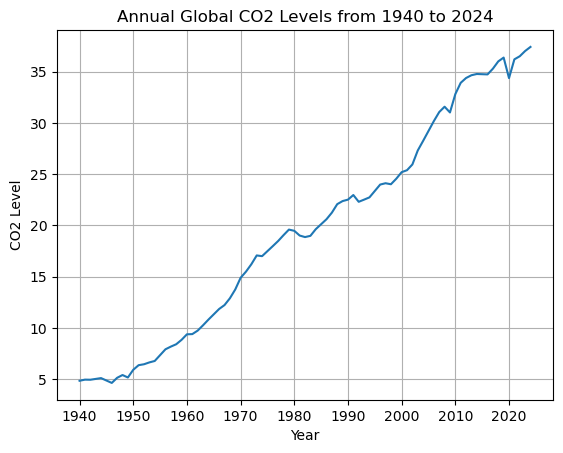

<Figure size 2000x1000 with 0 Axes>

In [1361]:
# plot the data to understand the trend

plt.title('Annual Global CO2 Levels from 1940 to 2024')
plt.plot(df['Year'], df['CO2 Level'])
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.xticks(range(1940, 2025, 10))
plt.grid()
plt.figure(figsize=(20, 10))
plt.show()


In [1362]:
# find and fill in the missing years
df_augmented = pd.DataFrame({'Year': range(1940, 2025)})
df_augmented = df_augmented.merge(df, on='Year', how='left')

missing_years = df_augmented[df_augmented['CO2 Level'].isnull()]['Year'].values

print(missing_years)
print(df_augmented.head(20))

[1945 1955 1965 1975 1985 1995 2005 2015]
    Year  CO2 Level
0   1940       4.86
1   1941       4.97
2   1942       4.96
3   1943       5.04
4   1944       5.12
5   1945        NaN
6   1946       4.65
7   1947       5.15
8   1948       5.42
9   1949       5.18
10  1950       5.93
11  1951       6.38
12  1952       6.47
13  1953       6.65
14  1954       6.79
15  1955        NaN
16  1956       7.93
17  1957       8.19
18  1958       8.42
19  1959       8.85


# Approximate the missing CO2 levels for correspomding years through Lagrange polynomials 

Create Lagrange Polynomial Functions to perform Linear, Quadratic and Cubic Approximation for Missing CO2 levels.

# 1.) Linear Lagrange Approximation

In [1363]:
def Linear_Lagrange_approximation(x, x_1, x_2, y_1, y_2):
    '''Linear Lagrange approximation for a given x using two points'''
    return y_1 * (x - x_2) / (x_1 - x_2) + y_2 * (x - x_1) / (x_2 - x_1)


In [1364]:
df_linear = df_augmented.copy()  # Create a separate copy

for year in missing_years:
    linear_x_vals = df_linear["Year"][df_linear["CO2 Level"].notnull()].values
    linear_y_vals = df_linear["CO2 Level"][df_linear["CO2 Level"].notnull()].values

    linear_x_below = linear_x_vals[linear_x_vals < year].max() if any(linear_x_vals < year) else None
    linear_x_above = linear_x_vals[linear_x_vals > year].min() if any(linear_x_vals > year) else None

    linear_y_below = df_linear.loc[df_linear["Year"] == linear_x_below, "CO2 Level"].values[0] if linear_x_below else None
    linear_y_above = df_linear.loc[df_linear["Year"] == linear_x_above, "CO2 Level"].values[0] if linear_x_above else None

    if linear_x_below is not None and linear_x_above is not None:
        linear_interpolated_value = Linear_Lagrange_approximation(year, linear_x_below, linear_x_above, linear_y_below, linear_y_above)
        df_linear.loc[df_linear["Year"] == year, "CO2 Level"] = linear_interpolated_value

print(df_linear.head(20))


    Year  CO2 Level
0   1940      4.860
1   1941      4.970
2   1942      4.960
3   1943      5.040
4   1944      5.120
5   1945      4.885
6   1946      4.650
7   1947      5.150
8   1948      5.420
9   1949      5.180
10  1950      5.930
11  1951      6.380
12  1952      6.470
13  1953      6.650
14  1954      6.790
15  1955      7.360
16  1956      7.930
17  1957      8.190
18  1958      8.420
19  1959      8.850


# 2.) Quadratic Lagrange Approximation

In [1365]:
def Quadratic_lagrange_approximation(x, x_1, x_2, x_3, y_1, y_2, y_3):
    '''Qudratic Langrange approximation for a given x using three points'''
    L0 = y_1 * (x - x_2) * (x - x_3) / ((x_1 - x_2) * (x_1 - x_3))
    L1 = y_2 * (x - x_1) * (x - x_3) / ((x_2 - x_1) * (x_2 - x_3))
    L2 = y_3 * (x - x_1) * (x - x_2) / ((x_3 - x_1) * (x_3 - x_2))
    return L0 + L1 + L2


In [1366]:

df_quadratic = df_augmented.copy()  # Separate copy for quadratic interpolation

for year in missing_years:
    quadratic_x_vals = df_quadratic["Year"][df_quadratic["CO2 Level"].notnull()].values
    quadratic_y_vals = df_quadratic["CO2 Level"][df_quadratic["CO2 Level"].notnull()].values

    # Find three nearest neighbors
    quadratic_x_neighbors = np.sort(quadratic_x_vals[np.abs(quadratic_x_vals - year).argsort()[:3]])
    quadratic_y_neighbors = [df_quadratic.loc[df_quadratic["Year"] == x, "CO2 Level"].values[0] for x in quadratic_x_neighbors]

    if len(quadratic_x_neighbors) == 3:
        quadratic_interpolated_value = Quadratic_lagrange_approximation(year, *quadratic_x_neighbors, *quadratic_y_neighbors)
        df_quadratic.loc[df_quadratic["Year"] == year, "CO2 Level"] = quadratic_interpolated_value

print(df_quadratic.head(20))



    Year  CO2 Level
0   1940   4.860000
1   1941   4.970000
2   1942   4.960000
3   1943   5.040000
4   1944   5.120000
5   1945   4.990000
6   1946   4.650000
7   1947   5.150000
8   1948   5.420000
9   1949   5.180000
10  1950   5.930000
11  1951   6.380000
12  1952   6.470000
13  1953   6.650000
14  1954   6.790000
15  1955   7.216667
16  1956   7.930000
17  1957   8.190000
18  1958   8.420000
19  1959   8.850000


# 3.) Cubic Lagrange Approximation

In [1367]:
def Cubic_lagrange_approximation(x, x_1, x_2, x_3, x_4, y_1, y_2, y_3, y_4):
    '''Cubic Langrange approximation for a given x using four points'''
    L0 = y_1 * (x - x_2) * (x - x_3) * (x - x_4) / ((x_1 - x_2) * (x_1 - x_3) * (x_1 - x_4))
    L1 = y_2 * (x - x_1) * (x - x_3) * (x - x_4) / ((x_2 - x_1) * (x_2 - x_3) * (x_2 - x_4))
    L2 = y_3 * (x - x_1) * (x - x_2) * (x - x_4) / ((x_3 - x_1) * (x_3 - x_2) * (x_3 - x_4))
    L3 = y_4 * (x - x_1) * (x - x_2) * (x - x_3) / ((x_4 - x_1) * (x_4 - x_2) * (x_4 - x_3))
    return L0 + L1 + L2 + L3

In [1368]:
df_cubic = df_augmented.copy()  # Separate copy for cubic interpolation

for year in missing_years:
    cubic_x_vals = df_cubic["Year"][df_cubic["CO2 Level"].notnull()].values
    cubic_y_vals = df_cubic["CO2 Level"][df_cubic["CO2 Level"].notnull()].values

    # Find four nearest neighbors
    cubic_x_neighbors = np.sort(cubic_x_vals[np.abs(cubic_x_vals - year).argsort()[:4]])
    cubic_y_neighbors = [df_cubic.loc[df_cubic["Year"] == x, "CO2 Level"].values[0] for x in cubic_x_neighbors]

    if len(cubic_x_neighbors) == 4:
        cubic_interpolated_value = Cubic_lagrange_approximation(year, *cubic_x_neighbors, *cubic_y_neighbors)
        df_cubic.loc[df_cubic["Year"] == year, "CO2 Level"] = cubic_interpolated_value

print(df_cubic.head(20))

    Year  CO2 Level
0   1940      4.860
1   1941      4.970
2   1942      4.960
3   1943      5.040
4   1944      5.120
5   1945      4.815
6   1946      4.650
7   1947      5.150
8   1948      5.420
9   1949      5.180
10  1950      5.930
11  1951      6.380
12  1952      6.470
13  1953      6.650
14  1954      6.790
15  1955      7.340
16  1956      7.930
17  1957      8.190
18  1958      8.420
19  1959      8.850


# Derivative Approximations

In [1369]:
def compute_all_derivatives(df, method="linear"):
    '''Computes derivatives using a single function for Linear, Quadratic, and Cubic approximations.'''
    df[f"{method}_Derivative"] = np.nan  # Initialize column

    for i in range(len(df)):
        if method == "linear":
            if 0 < i < len(df) - 1:  # Ensure valid range
                x_1, x_2 = df["Year"].iloc[i-1], df["Year"].iloc[i+1]
                y_1, y_2 = df["CO2 Level"].iloc[i-1], df["CO2 Level"].iloc[i+1]
                df.loc[df.index[i], f"{method}_Derivative"] = derivative_linear_lagrange_approximation(x_1, x_2, y_1, y_2)
        
        elif method == "quadratic":
            if 1 < i < len(df) - 1:  # Ensure three points exist
                x_1, x_2 = df["Year"].iloc[i-1], df["Year"].iloc[i+1]
                y_1, y_2 = df["CO2 Level"].iloc[i-1], df["CO2 Level"].iloc[i+1]
                df.loc[df.index[i], f"{method}_Derivative"] = derivative_linear_lagrange_approximation(x_1, x_2, y_1, y_2)

        elif method == "cubic":
            if 2 < i < len(df) - 2:  # Ensure four points exist
                x_1, x_2 = df["Year"].iloc[i-2], df["Year"].iloc[i+2]
                y_1, y_2 = df["CO2 Level"].iloc[i-2], df["CO2 Level"].iloc[i+2]
                df.loc[df.index[i], f"{method}_Derivative"] = derivative_linear_lagrange_approximation(x_1, x_2, y_1, y_2)

        else:
            raise ValueError("Method must be 'linear', 'quadratic', or 'cubic'.")

    return df

In [1372]:
df_linear_derivatives = compute_all_derivatives(df_linear.copy(), method="linear")
df_quadratic_derivatives = compute_all_derivatives(df_quadratic.copy(), method="quadratic")
df_cubic_derivatives = compute_all_derivatives(df_cubic.copy(), method="cubic")


print(df_quadratic_derivatives.head(20))





    Year  CO2 Level  quadratic_Derivative
0   1940   4.860000                   NaN
1   1941   4.970000                   NaN
2   1942   4.960000              0.035000
3   1943   5.040000              0.080000
4   1944   5.120000             -0.025000
5   1945   4.990000             -0.235000
6   1946   4.650000              0.080000
7   1947   5.150000              0.385000
8   1948   5.420000              0.015000
9   1949   5.180000              0.255000
10  1950   5.930000              0.600000
11  1951   6.380000              0.270000
12  1952   6.470000              0.135000
13  1953   6.650000              0.160000
14  1954   6.790000              0.283333
15  1955   7.216667              0.570000
16  1956   7.930000              0.486667
17  1957   8.190000              0.245000
18  1958   8.420000              0.330000
19  1959   8.850000              0.485000
